# FeedFoward

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [2]:
!gdown 1uWvIN8I5N9bZO6cbt1u1fg7OrZkfb6Z9

Downloading...
From: https://drive.google.com/uc?id=1uWvIN8I5N9bZO6cbt1u1fg7OrZkfb6Z9
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 51.7MB/s]


In [3]:
df = pd.read_csv('diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Distribution of PREGNANCIES


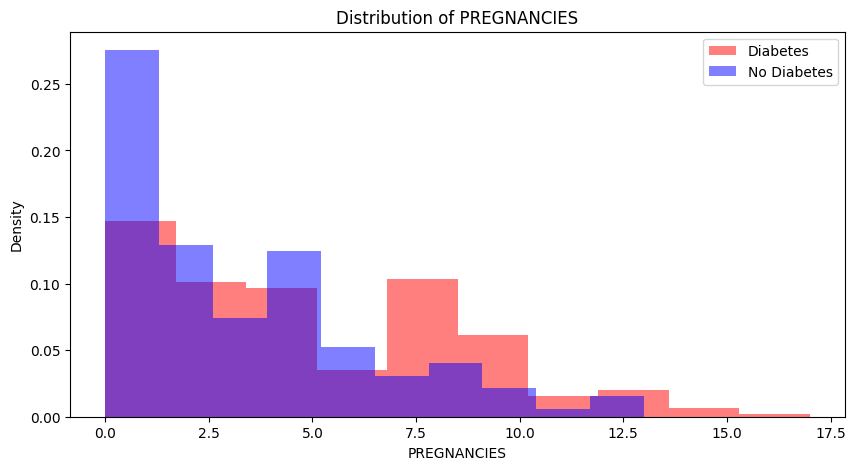


Distribution of GLUCOSE


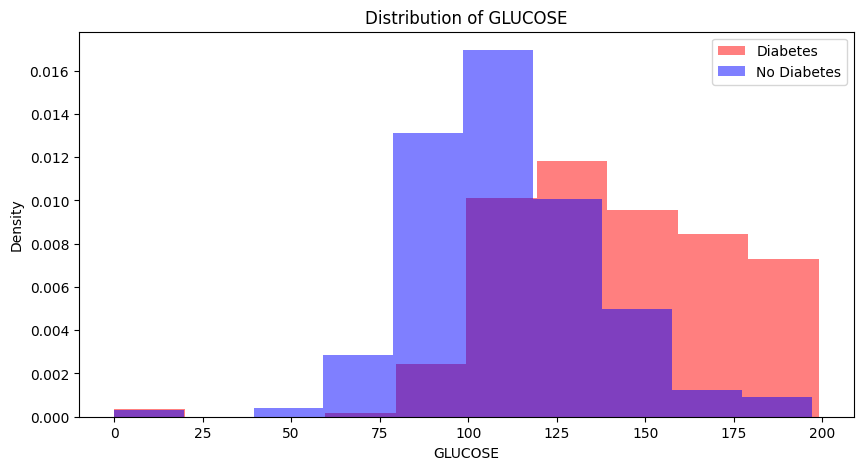


Distribution of BLOODPRESSURE


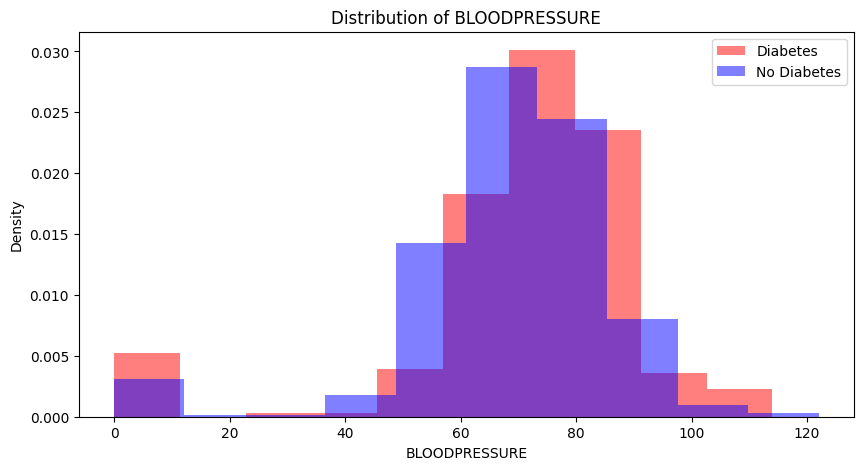


Distribution of SKINTHICKNESS


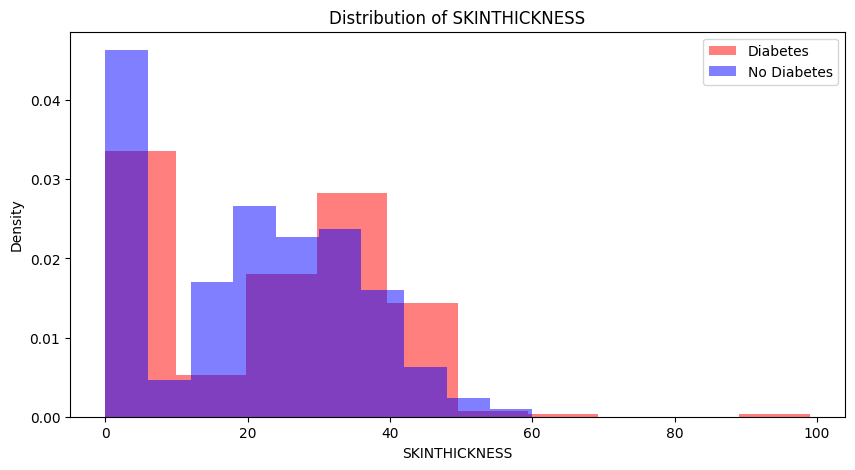


Distribution of INSULIN


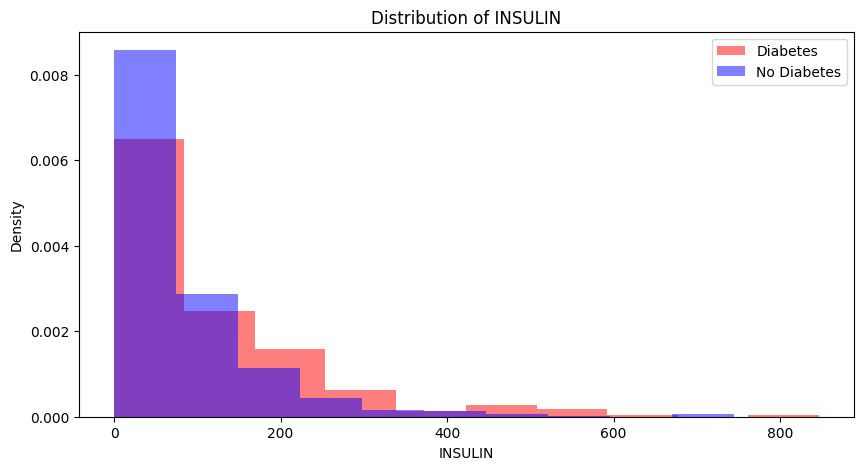


Distribution of BMI


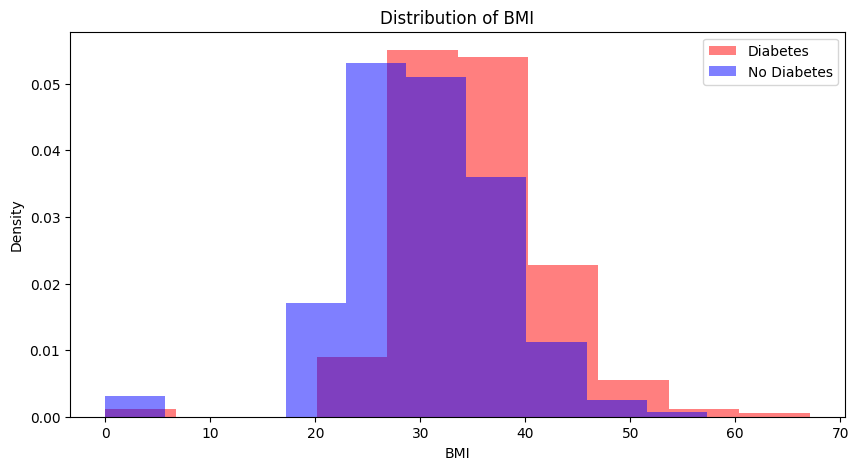


Distribution of DIABETESPEDIGREEFUNCTION


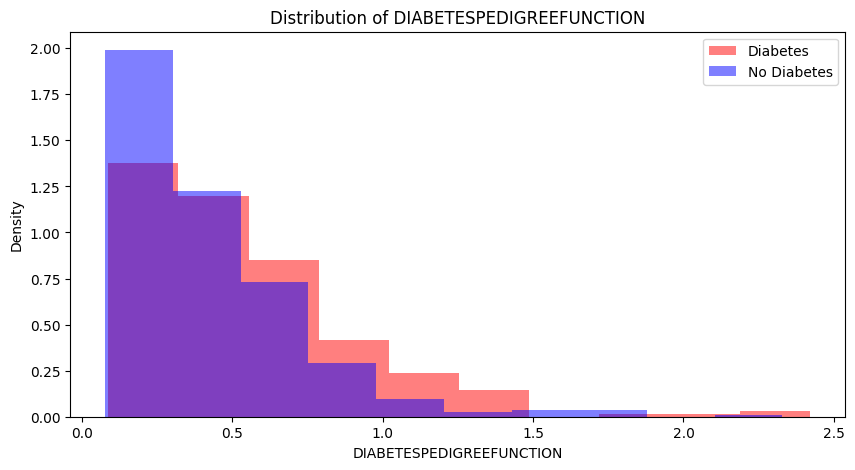


Distribution of AGE


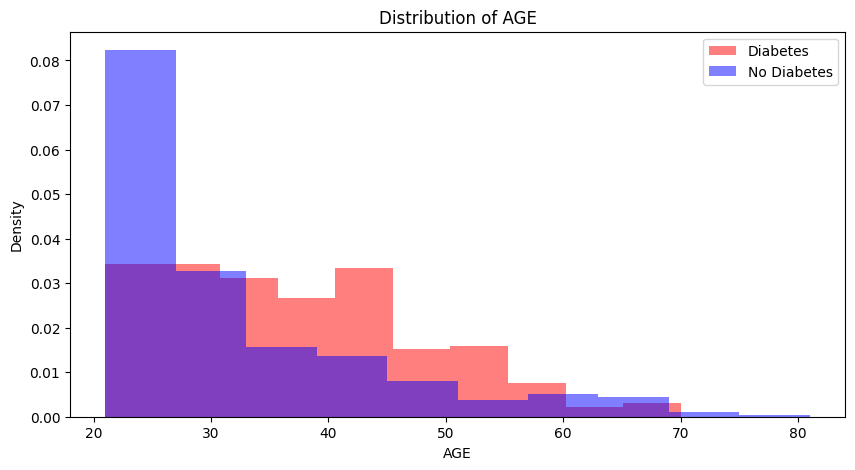

In [13]:
for col in df.columns[:-1]:
    label = col.upper()

    print(f'Distribution of {label}')
    plt.figure(figsize=(10, 5))

    plt.hist(df[df['Outcome'] == 1][col], label='Diabetes',color='r',
             alpha=0.5, density=True)
    plt.hist(df[df['Outcome'] == 0][col], label='No Diabetes', color='blue' ,
             alpha=0.5, density=True)

    plt.title(f'Distribution of {label}')

    plt.xlabel(label)
    plt.ylabel('Density')

    plt.legend()
    plt.show()

    print()

In [40]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

Distribution of PREGNANCIES


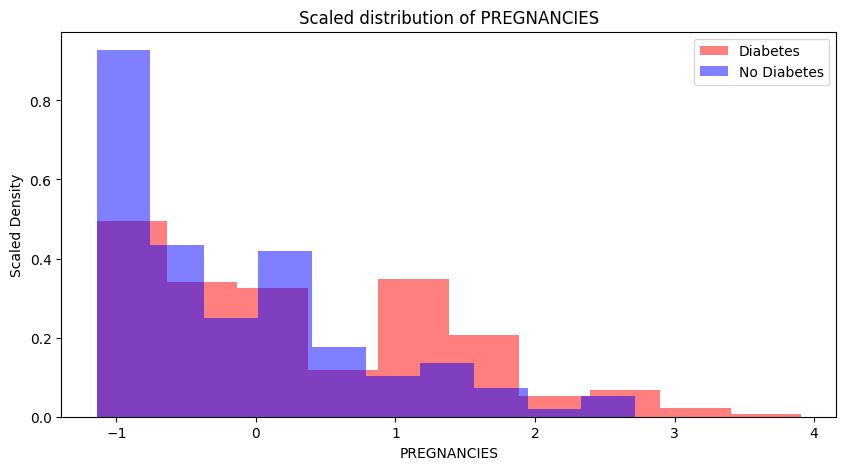


Distribution of GLUCOSE


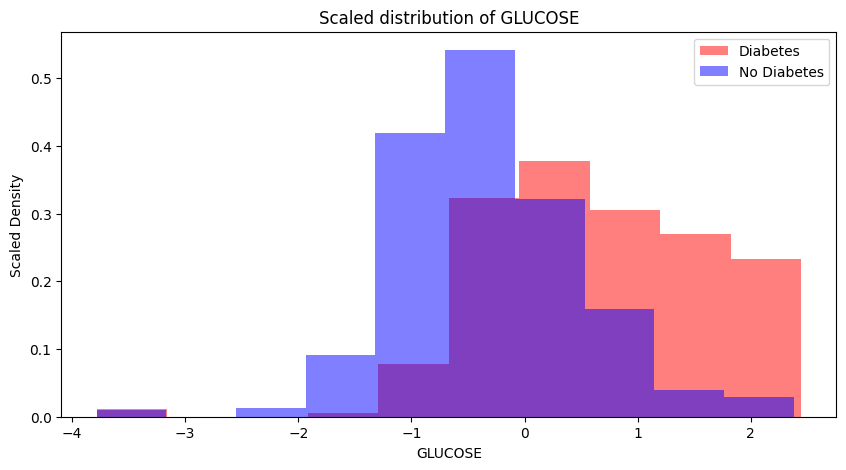


Distribution of BLOODPRESSURE


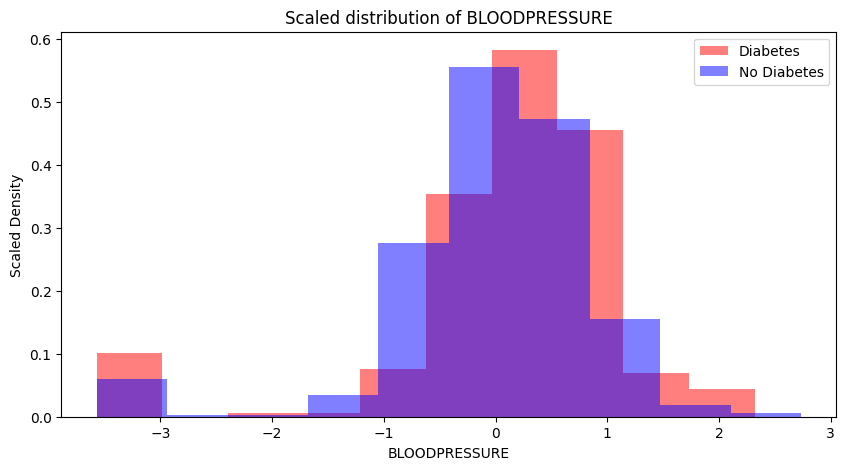


Distribution of SKINTHICKNESS


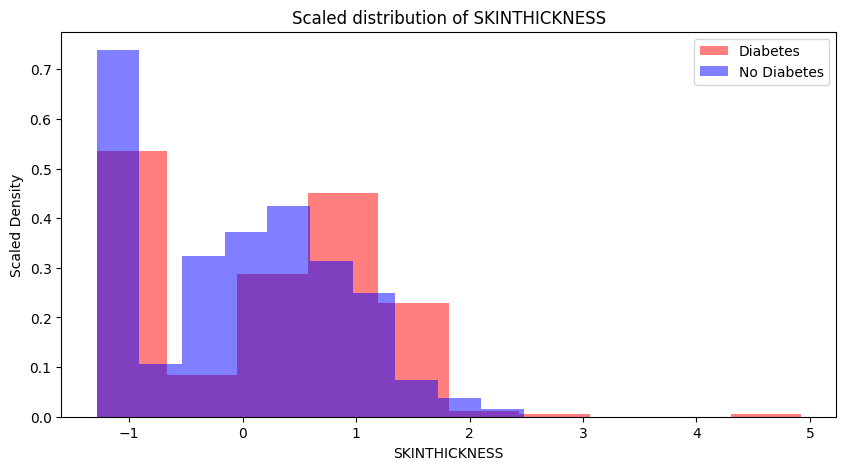


Distribution of INSULIN


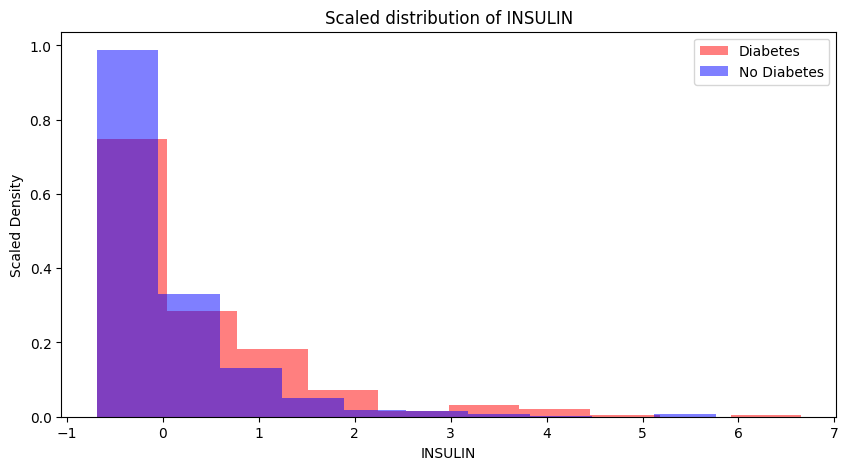


Distribution of BMI


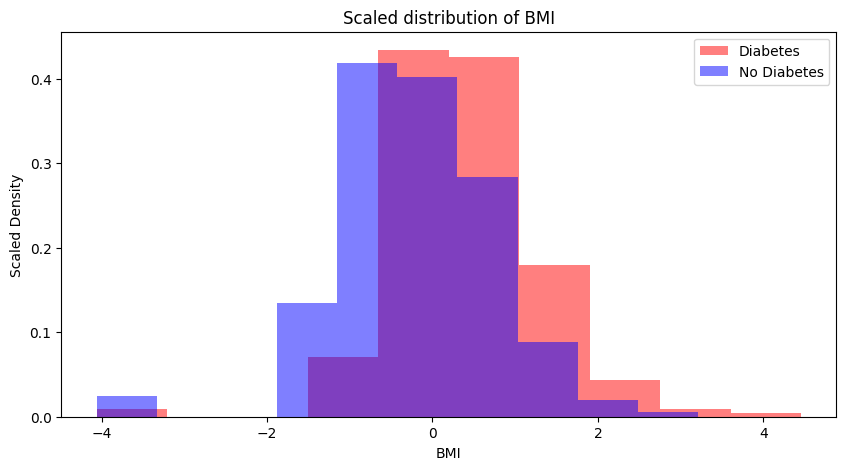


Distribution of DIABETESPEDIGREEFUNCTION


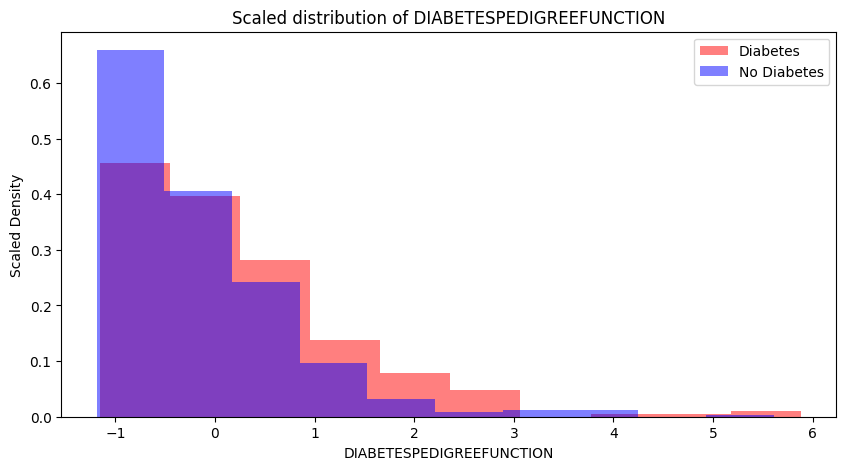


Distribution of AGE


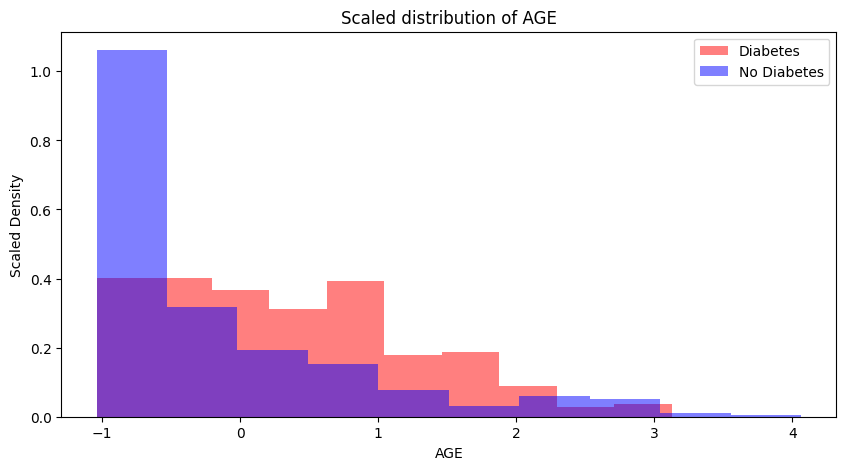

In [48]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

data = np.hstack((X, np.reshape(y , (-1, 1))))

transformed_df = pd.DataFrame(data, columns=df.columns)

for col in transformed_df.columns[:-1]:
    label = col.upper()

    print(f'Distribution of {label}')
    plt.figure(figsize=(10, 5))

    plt.hist(transformed_df[transformed_df['Outcome'] == 1][col], label='Diabetes',color='r',
             alpha=0.5, density=True)
    plt.hist(transformed_df[transformed_df['Outcome'] == 0][col], label='No Diabetes', color='blue' ,
             alpha=0.5, density=True)

    plt.title(f'Scaled distribution of {label}')

    plt.xlabel(label)
    plt.ylabel('Scaled Density')

    plt.legend()
    plt.show()

    print()

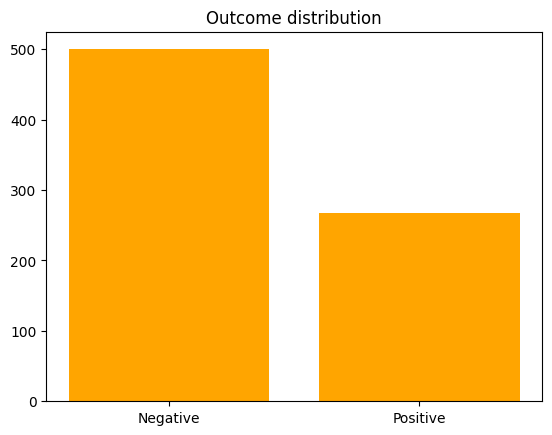

In [54]:
plt.bar(['Negative', 'Positive'],
        transformed_df.iloc[:,-1].value_counts().values,
        color='orange')

plt.title('Outcome distribution')

plt.show()

In [57]:
over = RandomOverSampler()
X,y = over.fit_resample(X, y)

In [58]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,
                                                random_state=42)

len(X_train), len(X_val), len(X_test)

(600, 200, 200)

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [31]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [59]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

In [37]:
model.evaluate(X_train, y_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6551 - loss: 9.5426  


[9.108338356018066, 0.6499999761581421]

In [62]:
model.fit(X_train, y_train,
          epochs = 20,
          batch_size = 16, # Quantidade de Examplos pra alteração de pesos
          validation_data = (X_val, y_val))

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3687 - loss: 0.7765 - val_accuracy: 0.5300 - val_loss: 0.6993
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5496 - loss: 0.6709 - val_accuracy: 0.5700 - val_loss: 0.6684
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5591 - loss: 0.6463 - val_accuracy: 0.5950 - val_loss: 0.6440
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6044 - loss: 0.6226 - val_accuracy: 0.6150 - val_loss: 0.6236
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6990 - loss: 0.5850 - val_accuracy: 0.6500 - val_loss: 0.6039
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7158 - loss: 0.5752 - val_accuracy: 0.6500 - val_loss: 0.5896
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7294 - loss: 0.5448 - val_accuracy: 0.6850 - val_loss: 0.5765
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7777 - loss: 0.5081 - val_accuracy: 0.6900 - val_l

In [63]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6958 - loss: 0.5408 


[0.5687302947044373, 0.7049999833106995]